**Prediction of Traffic Volume for Metro Trains Using Regression Techniques**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/indian-metro-data/Train.csv
/kaggle/input/indian-metro-data/Test.csv


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/kaggle/input/indian-metro-data/Train.csv')

In [4]:
data.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

In [5]:
data.dtypes

date_time               object
is_holiday              object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
weather_description     object
traffic_volume           int64
dtype: object

In [6]:
data.shape

(33750, 15)

In [7]:
data.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

In [8]:
data.traffic_volume

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
33745    2348
33746    2194
33747    2194
33748    1328
33749    1328
Name: traffic_volume, Length: 33750, dtype: int64

In [9]:
data.weather_type.unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [10]:
data.weather_description.unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f133c157470>,
      dtype=object)

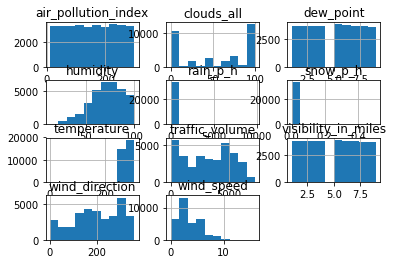

In [11]:
data.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f133c8152e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f133c6e8048>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f133c815048>],
 'medians': [<matplotlib.lines.Line2D at 0x7f133c6e89e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f133c6e8d30>],
 'means': []}

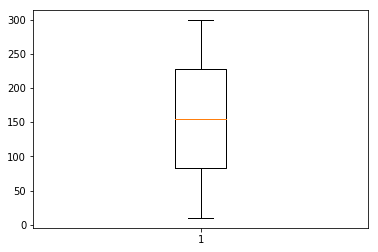

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(data.air_pollution_index)
#plt.boxplot([data.humidity,data.air_pollution_index])

In [13]:
data.corr()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
air_pollution_index,1.000000,-0.000277,-0.004166,0.000749,0.003499,0.003499,0.005368,0.000443,0.007227,-0.008541,-0.003751
humidity,-0.000277,1.000000,-0.147042,-0.046268,0.005510,0.005510,0.033273,-0.012161,0.016625,0.014520,0.016455
wind_speed,-0.004166,-0.147042,1.000000,0.191320,-0.005160,-0.005160,-0.052856,0.001165,-0.006534,-0.004456,0.016329
wind_direction,0.000749,-0.046268,0.191320,1.000000,0.000716,0.000716,-0.045843,0.002230,0.000321,0.020392,0.014278
visibility_in_miles,0.003499,0.005510,-0.005160,0.000716,1.000000,1.000000,0.000760,-0.008301,0.001453,-0.001582,0.001348
dew_point,0.003499,0.005510,-0.005160,0.000716,1.000000,1.000000,0.000760,-0.008301,0.001453,-0.001582,0.001348
temperature,0.005368,0.033273,-0.052856,-0.045843,0.000760,0.000760,1.000000,0.011071,-0.020721,-0.121334,0.127871
rain_p_h,0.000443,-0.012161,0.001165,0.002230,-0.008301,-0.008301,0.011071,1.000000,-0.000159,0.005206,0.005642
snow_p_h,0.007227,0.016625,-0.006534,0.000321,0.001453,0.001453,-0.020721,-0.000159,1.000000,0.032591,0.001197
clouds_all,-0.008541,0.014520,-0.004456,0.020392,-0.001582,-0.001582,-0.121334,0.005206,0.032591,1.000000,0.037922


In [14]:
data.corr().traffic_volume.sort_values()[::-1]

traffic_volume         1.000000
temperature            0.127871
clouds_all             0.037922
humidity               0.016455
wind_speed             0.016329
wind_direction         0.014278
rain_p_h               0.005642
dew_point              0.001348
visibility_in_miles    0.001348
snow_p_h               0.001197
air_pollution_index   -0.003751
Name: traffic_volume, dtype: float64

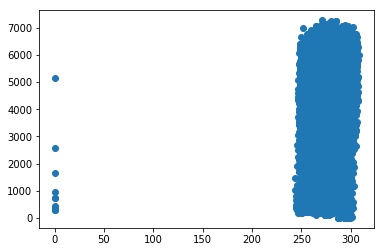

In [15]:
plt.scatter(data.temperature,data.traffic_volume)

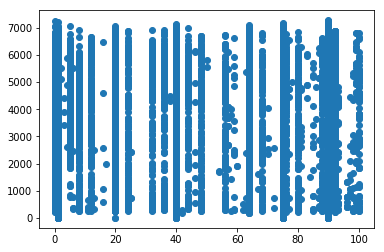

In [16]:
plt.scatter(data.clouds_all,data.traffic_volume)

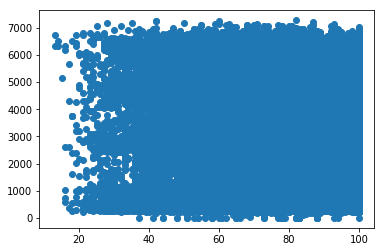

In [17]:
plt.scatter(data.humidity,data.traffic_volume)

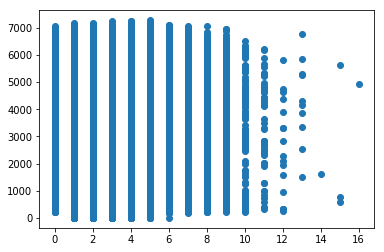

In [18]:
plt.scatter(data.wind_speed,data.traffic_volume)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f133c500518>,
 'caps': [<matplotlib.lines.Line2D at 0x7f133c500be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f133c5003c8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f133c50d2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f133c50d5f8>],
 'means': []}

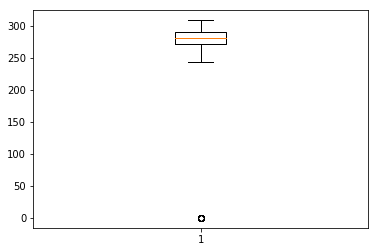

In [19]:
plt.boxplot(data.temperature)

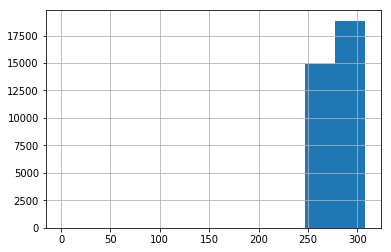

In [20]:
data.temperature.hist()

In [21]:
data.temperature.quantile(0.0003)

243.418681

In [22]:
data.shape

(33750, 15)

In [23]:
data1 = data[data.temperature>(data.temperature.quantile(0.0003))]

In [24]:
data1.shape

(33739, 15)

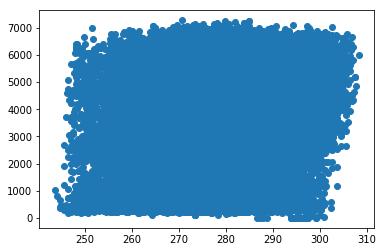

In [25]:
plt.scatter(data1.temperature,data1.traffic_volume)

In [26]:
data_x=data1[data1.columns[0:-1]]

In [27]:
data_x

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,2017-05-17 21:00:00,None,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist
33746,2017-05-17 22:00:00,None,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain
33747,2017-05-17 22:00:00,None,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist
33748,2017-05-17 23:00:00,None,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain


In [28]:
data_y=data1.traffic_volume

In [29]:
data_y

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
33745    2348
33746    2194
33747    2194
33748    1328
33749    1328
Name: traffic_volume, Length: 33739, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [31]:
print(data_x.dtypes)
data_x=data_x[data_x.columns[2:-2]]
print(data_x.dtypes)


date_time               object
is_holiday              object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
weather_description     object
dtype: object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
dtype: object


train MSE:  3965268.17697538
test MSE:  3965673.6218010434
train MSE:  3949223.6003657947
test MSE:  3999884.5601199297
train MSE:  3982307.557847918
test MSE:  3923259.742539077
train MSE:  3956351.3917702762
test MSE:  3983985.5258299145
train MSE:  3964815.233116636
test MSE:  3966763.461971488
train MSE:  3975554.302610165
test MSE:  3941821.9880396817
train MSE:  3901321.645538497
test MSE:  3889614.466462109
train MSE:  3968537.0582122384
test MSE:  3957689.686820096
train MSE:  3937975.0608030977
test MSE:  4029491.2294708686
train MSE:  3947409.4886659277
test MSE:  3988766.8999950043


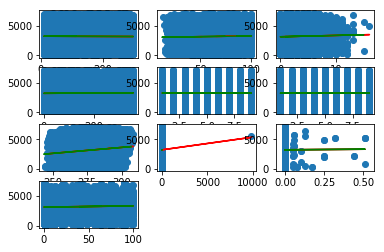

In [32]:
res = {}
c=1
for col in data_x.columns:
    
    train_x, test_x, train_y, test_y = train_test_split(data_x[col],data_y, test_size=0.3)
    train_x = train_x[:,np.newaxis]
    train_y = train_y[:,np.newaxis]
    test_x = test_x[:,np.newaxis]
    test_y = test_y[:,np.newaxis]
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(train_x)
    pred_test=lm.predict(test_x)
    plt.subplot(4,3,c)
    plt.scatter(train_x,train_y)
    plt.plot(train_x,pred,'r')
    plt.plot(test_x,pred_test,'g')
    c+=1
    print('train MSE: ', mean_squared_error(train_y,pred))
    print('test MSE: ', mean_squared_error(test_y,pred_test))

    trainRMSE = np.sqrt(mean_squared_error(train_y,pred))
    testRMSE = np.sqrt(mean_squared_error(test_y,pred_test))
    cname='Traffic Volume vs '+col
    res[cname]=[trainRMSE, testRMSE]

In [33]:
train_x, test_x, train_y, test_y = train_test_split(data_x,data_y, test_size=0.3)
#train_x = train_x[:,np.newaxis]
train_y = train_y[:,np.newaxis]
#test_x = test_x[:,np.newaxis]
test_y = test_y[:,np.newaxis]
lm=LinearRegression()
lm.fit(train_x,train_y)
pred=lm.predict(train_x)
pred_test=lm.predict(test_x)
#plt.scatter(train_x,train_y)
#plt.plot(train_x,pred,'r')
#plt.plot(test_x,pred_test,'g')
print('train MSE: ', mean_squared_error(train_y,pred))
print('test MSE: ', mean_squared_error(test_y,pred_test))

trainRMSE = np.sqrt(mean_squared_error(train_y,pred))
testRMSE = np.sqrt(mean_squared_error(test_y,pred_test))
cname='Traffic Volume vs All Columns'
res[cname]=[trainRMSE, testRMSE]

train MSE:  3861846.7361199744
test MSE:  64541657.11584835


In [34]:
res

{'Traffic Volume vs air_pollution_index': [1991.2981135368407,
  1991.399915085125],
 'Traffic Volume vs humidity': [1987.2653573103403, 1999.971139821755],
 'Traffic Volume vs wind_speed': [1995.5719876386113, 1980.7220255601433],
 'Traffic Volume vs wind_direction': [1989.0579156400338, 1995.9923661752603],
 'Traffic Volume vs visibility_in_miles': [1991.1843794879057,
  1991.6735329796115],
 'Traffic Volume vs dew_point': [1993.8792096338648, 1985.4022232383245],
 'Traffic Volume vs temperature': [1975.176358085145, 1972.210553278252],
 'Traffic Volume vs rain_p_h': [1992.1187359723913, 1989.3943014948284],
 'Traffic Volume vs snow_p_h': [1984.4331837588027, 2007.3592676625847],
 'Traffic Volume vs clouds_all': [1986.8088706933859, 1997.1897506233613],
 'Traffic Volume vs All Columns': [1965.158196207108, 8033.782242247318]}

In [35]:
resdf = pd.DataFrame(res, index = ['Train RMSE', 'Test RMSE'])
resdf = resdf.T

In [36]:
resdf

,Train RMSE,Test RMSE
Traffic Volume vs air_pollution_index,1991.298114,1991.399915
Traffic Volume vs humidity,1987.265357,1999.971140
Traffic Volume vs wind_speed,1995.571988,1980.722026
Traffic Volume vs wind_direction,1989.057916,1995.992366
Traffic Volume vs visibility_in_miles,1991.184379,1991.673533
Traffic Volume vs dew_point,1993.879210,1985.402223
Traffic Volume vs temperature,1975.176358,1972.210553
Traffic Volume vs rain_p_h,1992.118736,1989.394301
Traffic Volume vs snow_p_h,1984.433184,2007.359268
Traffic Volume vs clouds_all,1986.808871,1997.189751


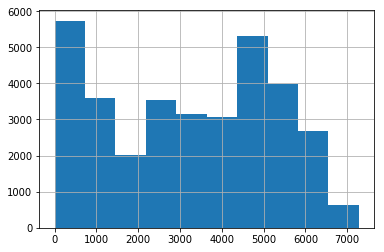

In [37]:
data1.traffic_volume.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f131e30bf60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f131e316630>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f131e30bdd8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f131e316cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f131e321048>],
 'means': []}

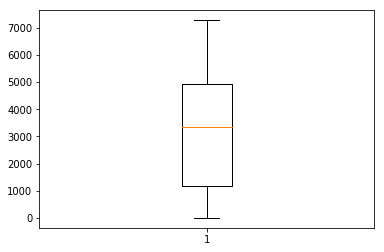

In [38]:
plt.boxplot(data1.traffic_volume)

As per our observation, the regression of Traffic Volume is not strongly depending on any of the attributes.
The RMSE for test data is around 2000 which is better than nothing to predict. 